In [6]:
# !pip install shap

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Mean Squared Error: 3513.66
R^2 Score: 0.35


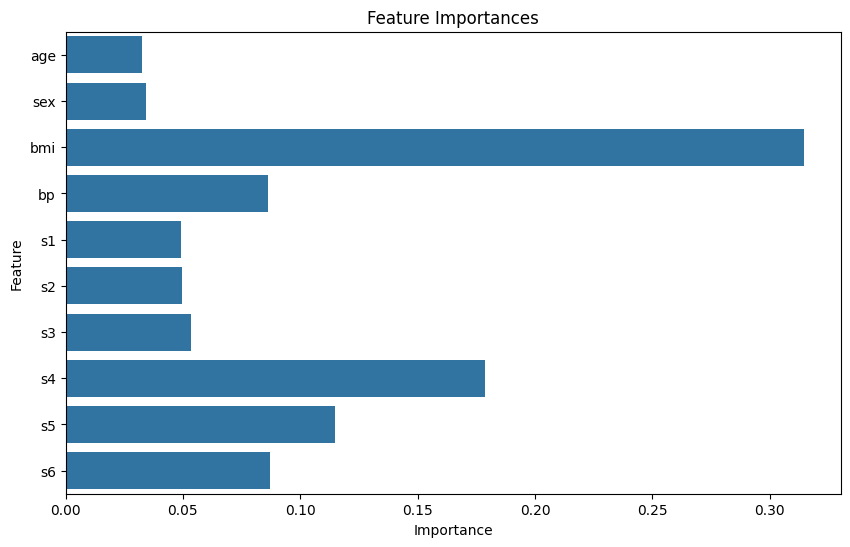

In [23]:
import shap
import xgboost
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert to a DataFrame for readability
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print(df.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost model for regression
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature Importance Plot
xgb_feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

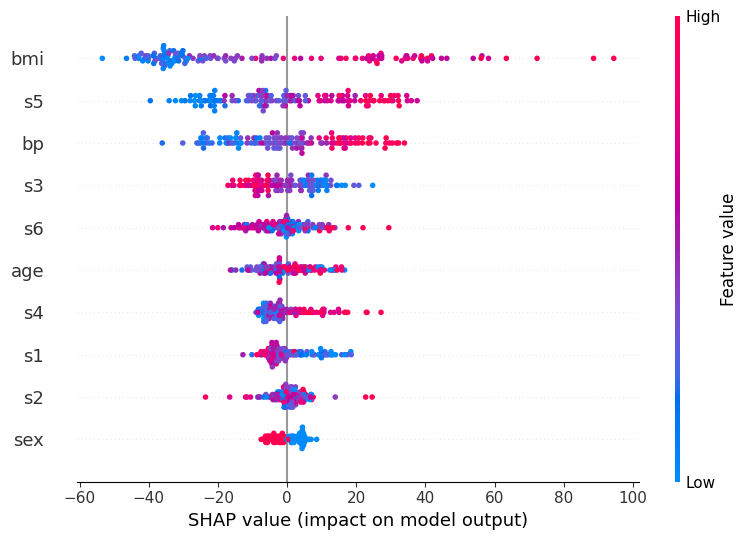

<Figure size 1000x600 with 0 Axes>

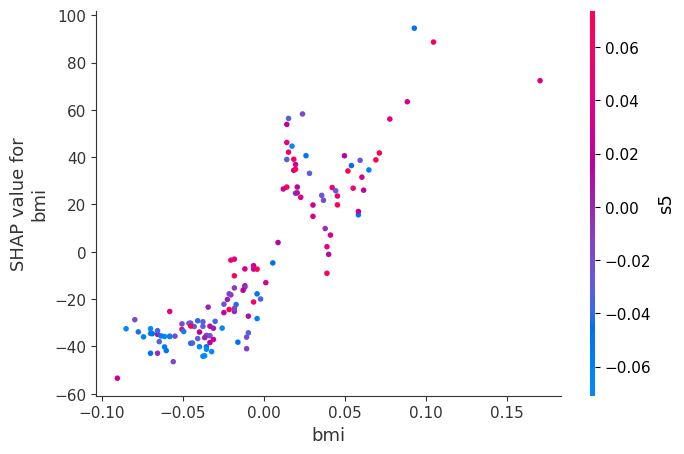

In [38]:
# SHAP Summary Plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# SHAP Dependence Plot for BMI
plt.figure(figsize=(10, 6))
shap.dependence_plot(feature_names.index('bmi'), shap_values, X_test, feature_names=feature_names)

In [43]:
# Reference: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/explainers/GPUTree.html
import xgboost

import shap

# get a dataset on income prediction
X, y = shap.datasets.adult()

# train an XGBoost model (but any other model type would also work)
model = xgboost.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
# build a Permutation explainer and explain the model predictions on the given dataset
explainer = shap.TreeExplainer(model, X)
shap_values = explainer(X)

# get just the explanations for the positive class
shap_values = shap_values

 99%|===================| 32385/32561 [01:59<00:00]       

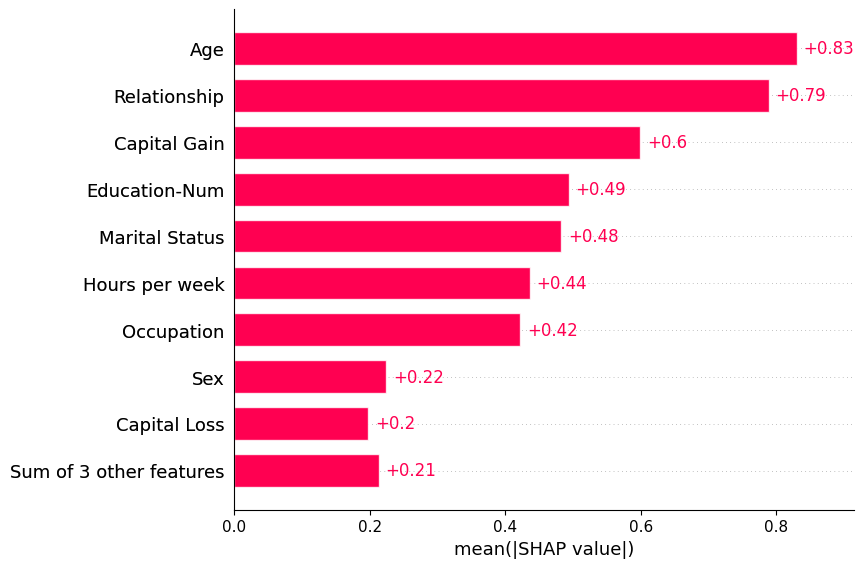

In [46]:
shap.plots.bar(shap_values)

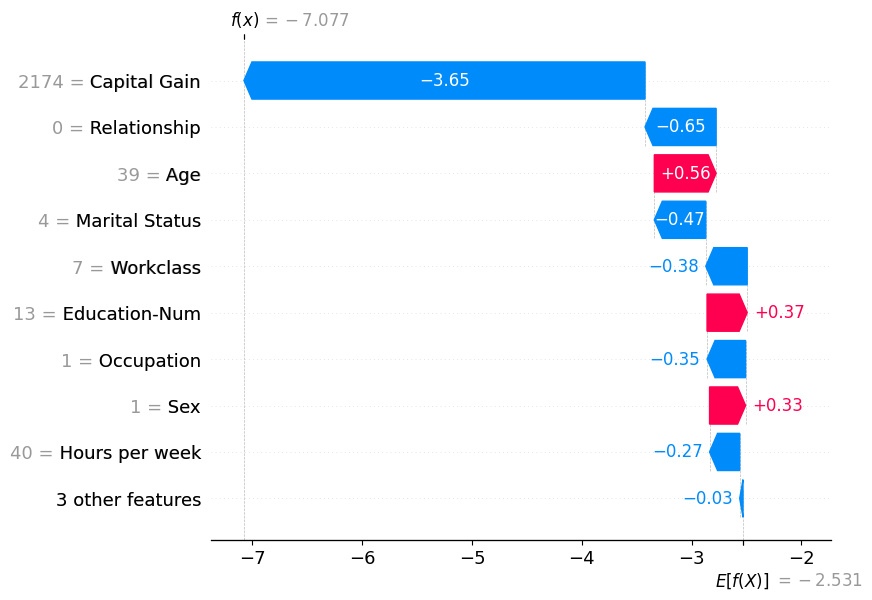

In [47]:
shap.plots.waterfall(shap_values[0])

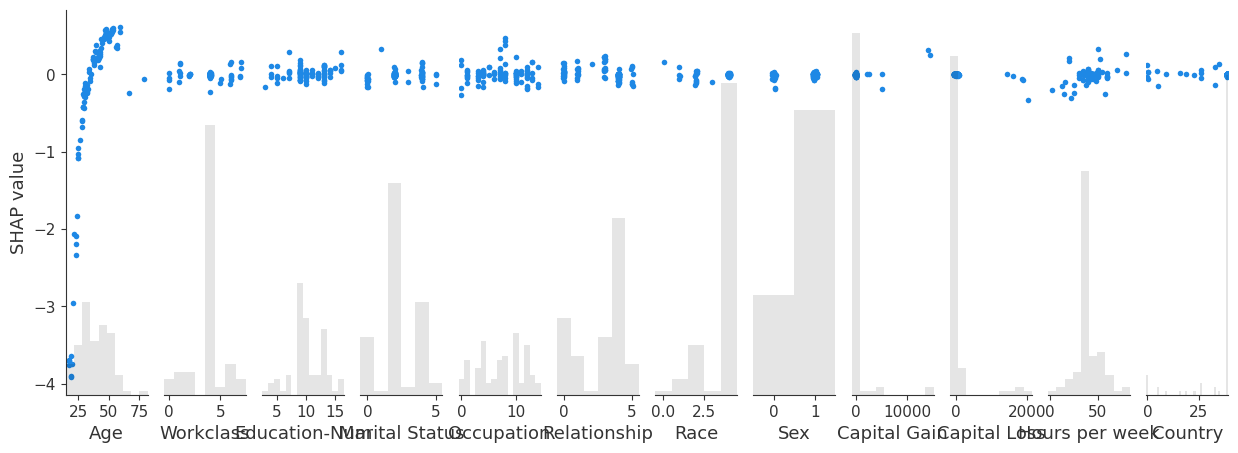

In [49]:
explainer2 = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
interaction_shap_values = explainer2(X[:100], interactions=True)
shap.plots.scatter(interaction_shap_values[:, :, 0])